In [252]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [253]:
def show(img):
    cv2.imshow('dst',img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

In [254]:
img1= cv2.imread('1.jpg')
img2= cv2.imread('2.jpg')
gray1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [255]:
dst1 = cv2.cornerHarris(gray1, 2, 3, 0.04)
dst2 = cv2.cornerHarris(gray2, 2, 3, 0.04)

In [256]:
threshhold = 0.18
img1[dst1>threshhold*dst1.max()]=[0,0,255]  #dst>0.01*dst.max()这么多返回是满足条件的dst索引值
img2[dst2>threshhold*dst2.max()]=[0,0,255]
cor_num = np.sum(dst1>threshhold*dst1.max())
#dst1[dst1>threshhold*dst1.max()]=[255]  
#dst1=dst1.astype(np.uint8) #转为Int类型
#show(dst1)

## SSD
平方误差计算，用3*3窗分别遍历两张图的角点，找出误差最小的点。

In [257]:
def ssd_match(img1,corners1,img2,corners2):
    threshhold = 0.18 #多次实验找到角点数量60个的阈值
    match_count=0
    h1,w1=img1.shape
    h2,w2=img2.shape
    cor_num1 = np.sum(corners1>threshhold*corners1.max())
    coor1=np.argwhere(corners1>threshhold*corners1.max())#返回坐标索引
    coor2=np.argwhere(corners2>threshhold*corners2.max())
    cor_num2 = np.sum(corners2>threshhold*corners2.max())
    match_list = np.mat(np.zeros((max(cor_num1,cor_num2),2))) #存储匹配点坐标
    for i in range(cor_num1):
        erro_min = 9000000 #预设最小误差
        for j in range(cor_num2): 
            if coor1[i,0]+1<h1 and coor1[i,1]+1 < w1 and  coor1[i,0]-1 >=0 and coor1[i,1]-1 >=0 and coor2[j,0]+1<h2 and coor2[j,1]+1 < w2 and  coor2[j,0]-1 >=0 and coor2[j,1]-1 >=0:
                erro = 0
                for x in range(-1,2): # -1,0,1 3*3矩阵
                    for y in range(-1,2):
                        erro +=  ( img1[coor1[i,0]+x,coor1[i,1]+y]-img2[coor2[j,0]+x,coor2[j,1]+y])**2
                #print(erro)
                if erro < erro_min : #找出最小误差，但必须小于阈值
                    erro_min = erro
                    #print(erro_min)
                    match_list[match_count]=[i,j] #作图第i个和右图第j个匹配
        #print(erro_min)
        if erro_min < 1000000: #多次实验找到的阈值。。
            match_count=match_count+1
    return match_count,match_list
                
                



## SAD
同上，只是计算公式变了

In [258]:
def sad_match(img1,corners1,img2,corners2):
    threshhold = 0.18
    match_count=0
    h1,w1=img1.shape
    h2,w2=img2.shape
    cor_num1 = np.sum(corners1>threshhold*corners1.max())
    coor1=np.argwhere(corners1>threshhold*corners1.max())#返回坐标索引
    coor2=np.argwhere(corners2>threshhold*corners2.max())
    cor_num2 = np.sum(corners2>threshhold*corners2.max())
    match_list = np.mat(np.zeros((max(cor_num1,cor_num2),2))) #存储匹配点坐标
    for i in range(cor_num1):
        erro_min = 10000 #预设最小误差
        for j in range(cor_num2): 
            if coor1[i,0]+1<h1 and coor1[i,1]+1 < w1 and  coor1[i,0]-1 >=0 and coor1[i,1]-1 >=0 and coor2[j,0]+1<h2 and coor2[j,1]+1 < w2 and  coor2[j,0]-1 >=0 and coor2[j,1]-1 >=0:
                erro = 0
                for x in range(-1,2): # -1,0,1 3*3矩阵
                    for y in range(-1,2):
                        erro +=  abs( img1[coor1[i,0]+x,coor1[i,1]+y]-img2[coor2[j,0]+x,coor2[j,1]+y])
                #print(erro)
                if erro < erro_min : #找出最小误差，但必须小于阈值
                    erro_min = erro
                    #print(erro_min)
                    match_list[match_count]=[i,j] #作图第i个和右图第j个匹配
        #print(erro_min)
        if erro_min < 1000: #多次实验找到的阈值。。
            match_count=match_count+1
    return match_count,match_list
                
                    

In [259]:
count,Match =ssd_match(gray1,dst1,gray2,dst2)
count_sad,Match_sad =sad_match(gray1,dst1,gray2,dst2)
Match = Match.astype('uint8')
Match_sad = Match_sad.astype('uint8')
corners1=np.argwhere(dst1>threshhold*dst1.max())#返回坐标索引
corners2=np.argwhere(dst2>threshhold*dst2.max())
print(count)


30


C:\Users\Stacey\AppData\Local\Temp\ipykernel_7700\1511644848.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
  erro +=  ( img1[coor1[i,0]+x,coor1[i,1]+y]-img2[coor2[j,0]+x,coor2[j,1]+y])**2


In [260]:
m=max(img1.shape[0],img2.shape[0])
n=max(img1.shape[1],img2.shape[1])
final=np.zeros((m,2*n,3))
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        final[i,j,:]=img1[i,j,:]
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        final[i,j+n,:]=img2[i,j,:]
final =final.astype('uint8')

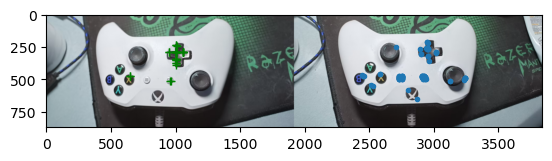

In [261]:
plt.figure
plt.imshow(final.astype('uint8'))
plt.plot(corners1[:,1],corners1[:,0],'g+');
plt.plot(corners2[:,1]+n,corners2[:,0],'.');

## 首先是ssd展示

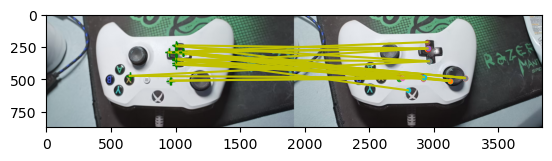

In [262]:
plt.figure
plt.imshow(final.astype('uint8'))
for i in range(count):
    plt.plot(corners1[Match[i,0],1],corners1[Match[i,0],0],'g+');
    plt.plot(corners2[Match[i,1],1]+n,corners2[Match[i,1],0],'.');
    plt.plot([corners1[Match[i,0],1],corners2[Match[i,1],1]+n],[corners1[Match[i,0],0],corners2[Match[i,1],0]],'y');

## 然后是sad

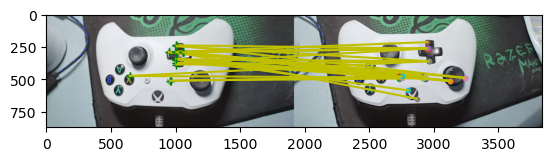

In [263]:
plt.figure
plt.imshow(final.astype('uint8'))
for i in range(count):
    plt.plot(corners1[Match_sad[i,0],1],corners1[Match_sad[i,0],0],'g+');
    plt.plot(corners2[Match_sad[i,1],1]+n,corners2[Match_sad[i,1],0],'.');
    plt.plot([corners1[Match_sad[i,0],1],corners2[Match_sad[i,1],1]+n],[corners1[Match_sad[i,0],0],corners2[Match_sad[i,1],0]],'y');